TA DATAWAREHOUSE

In [83]:
import pandas as pd
import sqlite3
import math
import datetime 
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 44em; }</style>"))

In [84]:
conn = sqlite3.connect('databa.db')

In [85]:
c = conn.cursor()

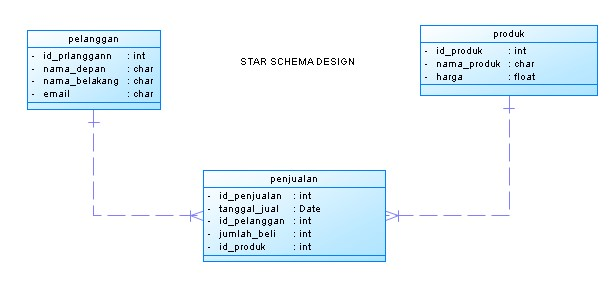

In [86]:
from IPython.display import Image
Image(filename='diagram.jpg') 

In [87]:
c.executescript('drop table if exists pelanggan')
c.executescript('drop table if exists produk')
c.executescript('drop table if exists penjualan')
c.execute("CREATE TABLE IF NOT EXISTS 'pelanggan' ('id_pelanggan' INT, 'nama_depan' VARCHAR(255) NULL, 'nama_belakang' VARCHAR(255) NULL,'email' VARCHAR(255) NULL, PRIMARY KEY ('id_pelanggan'))")
c.execute("CREATE TABLE IF NOT EXISTS 'produk' ( 'id_produk' INT, 'nama_produk' VARCHAR(255) NULL, 'harga' FLOAT NULL, PRIMARY KEY ('id_produk'))")
c.execute("CREATE TABLE IF NOT EXISTS 'penjualan' ( 'id_penjualan', 'tanggal_jual' DATE NULL, 'jumlah_beli' INT NULL, 'id_pelanggan' INT NOT NULL, 'id_produk' INT NOT NULL, PRIMARY KEY ('id_penjualan'), FOREIGN KEY ('id_pelanggan') REFERENCES 'pelanggan' ('id_pelanggan') ON DELETE NO ACTION ON UPDATE NO ACTION, FOREIGN KEY ('id_produk') REFERENCES 'produk' ('id_produk') ON DELETE NO ACTION ON UPDATE NO ACTION)")

In [121]:
df = pd.read_excel('MOCK_DATA.xlsx')
df

nama_depan nama_belakang                             email  id_produk  \
0        Vanny    Choulerton  vchoulerton0@businessinsider.com    2627483   
1        Petra         Letty              pletty1@omniture.com    2361688   
2       Weidar          Moon             wmoon2@cloudflare.com    1286255   
3        Tessy     Poppleton             tpoppleton3@github.io    3276724   
4     Marybeth        Tingle                  mtingle4@fc2.com    4812562   
..         ...           ...                               ...        ...   
995       Greg     Jeffcoate        gjeffcoatern@microsoft.com    7534734   
996     Moises     McCullock               mmccullockro@wp.com    5968391   
997        Mar         Gypps                 mgyppsrp@phoca.cz    8863800   
998      Ansel    Giovannoni        agiovannonirq@mashable.com    8825793   
999     Hunter        Haslin                hhaslinrr@dmoz.org    8525488   

                     nama_produk  harga  jumlah_beli tanggal_jual  \
0            Allspice   Jamaican   5062           40   2020-01-07   
1            Allspice   Jamaican   5062           35   2020-03-02   
2                       Amaretto   1082           20   2020-01-17   
3      Anchovy Paste   56 G Tube   7081           32   2020-02-21   
4             Appetiser   Bought   6852            7   2019-06-17   
..                           ...    ...          ...          ...   
995      Yogurt   French Vanilla   4312           19   2019-08-08   
996               Yogurt   Plain   2075           47   2019-12-21   
997  Yogurt   Strawberry, 175 Gr   3327           15   2019-06-09   
998             Zucchini   Green   5734           28   2019-10-18   
999            Zucchini   Yellow   7195           22   2019-09-02   

      harga_total   
0           322000  
1           200585  
2            76700  
3            73888  
4            38899  
..             ...  
995         184528  
996          92402  
997          75945  
998          77616  
999          30734  

[1000 rows x 9 columns]

In [118]:
pelanggan = []
produk = []


for i,j in df.iterrows():
    if [j[4]] not in produk:
        produk.append([j[4]])   
    if [j[0],j[1], j[2]] not in pelanggan:
        pelanggan.append([j[0], j[1], j[2]])

         
            
penjualan = []
for i,j in df.iterrows():   
    p = -1
    for index, value in enumerate(pelanggan):
        if value[2] == j[2]:
            p = index+1
            break
    
        
    prod = -1
    for index, value in enumerate(produk):
        if value[0] == j[4]:
            prod = index+1

    # print(str(j[7]).replace(" 00:00:00", ""))
    penjualan.append([str(j[7]).replace(" 00:00:00", ""),p,j[6],prod])

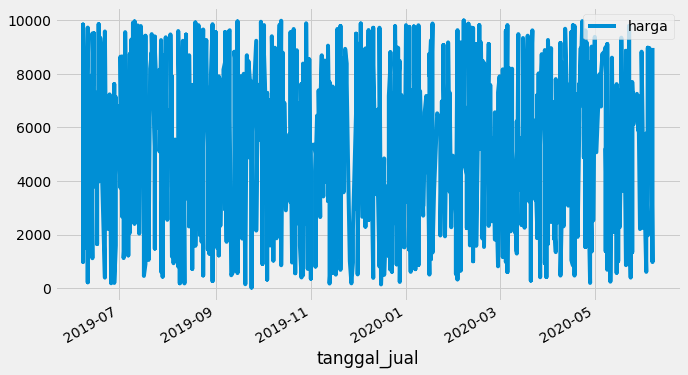

In [125]:
df.plot.line(x='tanggal_jual', y='harga', figsize=(10,6))